In [ ]:
import numpy as np
from PIL import Image

In [ ]:
from google.colab import files
file1=files.upload()

Saving img2.png to img2.png


In [ ]:
im=Image.open('/content/img2.png')

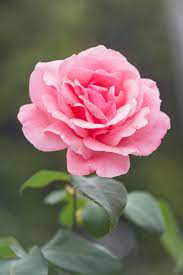

In [ ]:
im

In [ ]:
im_g=im.convert('L')

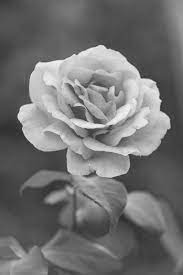

In [ ]:
im_g

In [ ]:
neg_im=im.point(lambda x: 255-x)

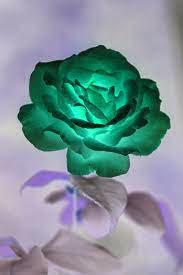

In [ ]:
neg_im

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
im1=cv2.imread('/content/img2.png', 0)

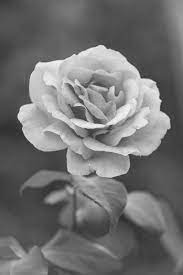

In [ ]:
cv2_imshow(im1)

In [ ]:
type(im1)

numpy.ndarray

In [ ]:
neg_im1=np.max(im1)-im1

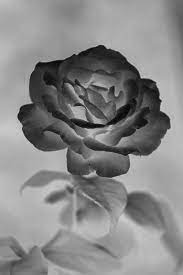

In [ ]:
cv2_imshow(neg_im1)

In [ ]:
# c=1
c=255/(np.log(1+np.max(im1)))
print(c)
#c=40
log_im1= c*np.log(1+im1)

46.18342931216994


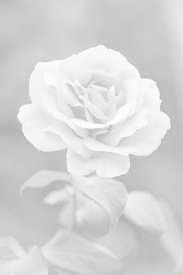

In [ ]:
cv2_imshow(log_im1)

In [ ]:
gamma=[0.1, 0.5, 1.5, 2.2]

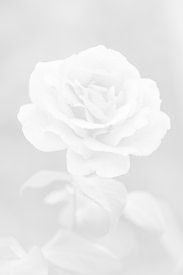

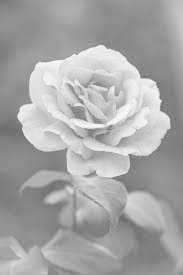

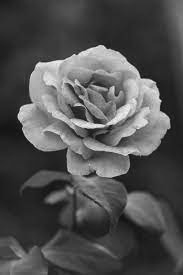

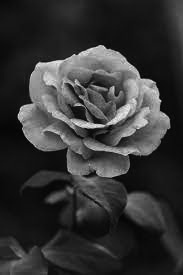

In [ ]:
for i in gamma:
  power_im1=255*(im1/255)**i
  cv2_imshow(power_im1)

In [ ]:
def pixelval(pix, r1, s1, r2, s2):
  if (0<=pix and pix<=r1):
    return (s1/r1)*pix
  elif (r1<pix and pix<=r2):
    return ((s2-s1)/(r2-r1))*(pix-r1)+s1
  else:
    return ((255-s2)/(255-r2))*(pix-r2)+s2

In [ ]:
r1=70
r2=140
s1=10
s2=250

In [ ]:
pixelval_vec=np.vectorize(pixelval)

In [ ]:
contrast_streched=pixelval_vec(im1, r1, s1, r2, s2)

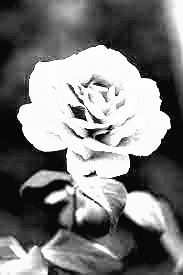

In [ ]:
cv2_imshow(contrast_streched)

In [ ]:
th=150

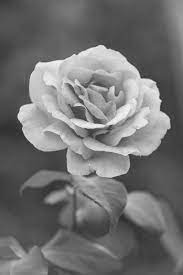

In [ ]:
cv2_imshow(im1)

In [ ]:
thresh_im=np.zeros(shape=np.shape(im1))

In [ ]:
im1

array([[ 57,  58,  58, ..., 143, 144, 145],
       [ 58,  59,  59, ..., 144, 145, 145],
       [ 60,  60,  60, ..., 144, 145, 146],
       ...,
       [135, 137, 140, ...,  86,  84,  85],
       [135, 137, 140, ...,  85,  84,  85],
       [134, 136, 140, ...,  85,  84,  84]], dtype=uint8)

In [ ]:
thresh_im

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(im1.shape[0]):
  for j in range(im1.shape[1]):
    if im1[i][j]>80:
      thresh_im[i][j]=255
    else:
      thresh_im[i][j]=0


In [ ]:
im1.shape[0]

275

In [ ]:

thresh_im

array([[  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

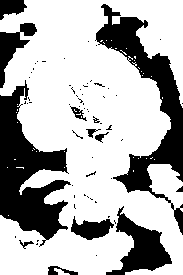

In [ ]:
cv2_imshow(thresh_im)